Analisis Pertanyaan Terbuka TPBIS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top Words in Bag of Words Model:
perpustakaan    211
program         103
desa             56
kegiatan         52
dukungan         50
pendampingan     46
tpbis            45
masyarakat       42
pengelola        41
pemerintah       37
dtype: int64


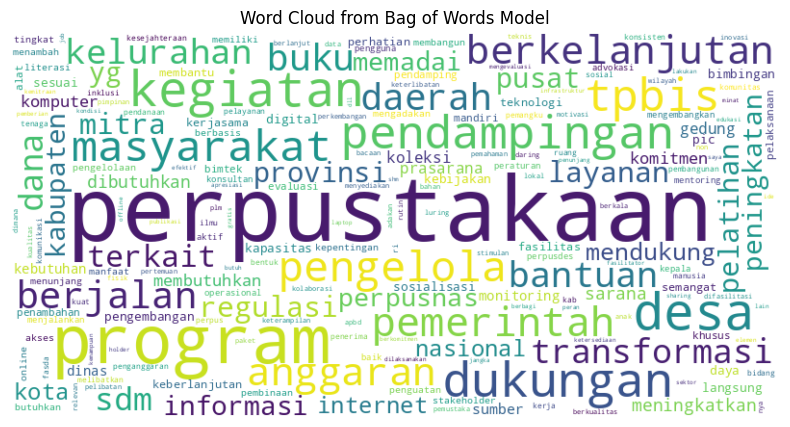

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# ✅ Download stopwords (only needed once)
nltk.download('stopwords')

# ✅ Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Change path if needed

# ✅ Text Preprocessing Function
def preprocess_text(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    stop_words = set(stopwords.words('indonesian'))  # Use Indonesian stopwords
    words = text.lower().split()  # Lowercase and split words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# ✅ Apply Preprocessing
data['Harapan_clean'] = data['Harapan'].astype(str).apply(preprocess_text)

# ✅ Create Bag of Words (BoW) Model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Harapan_clean'])  # Convert text into word frequency matrix

# ✅ Convert to DataFrame for Analysis
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq = bow_df.sum().sort_values(ascending=False)  # Get word frequency

# ✅ Display Top Words
print("\nTop Words in Bag of Words Model:")
print(word_freq.head(10))

# ✅ Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# ✅ Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Bag of Words Model")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Words by Frequency:
              Word  Frequency
15   perpustakaan        211
16        program        103
7            desa         56
9        kegiatan         52
8        dukungan         50
13   pendampingan         46
18          tpbis         45
11     masyarakat         42
14      pengelola         41
12     pemerintah         37
0        anggaran         36
3   berkelanjutan         36
2        berjalan         33
4            buku         31
5          daerah         31
1         bantuan         30
10      kelurahan         28
19   transformasi         26
6            dana         24
17            sdm         23


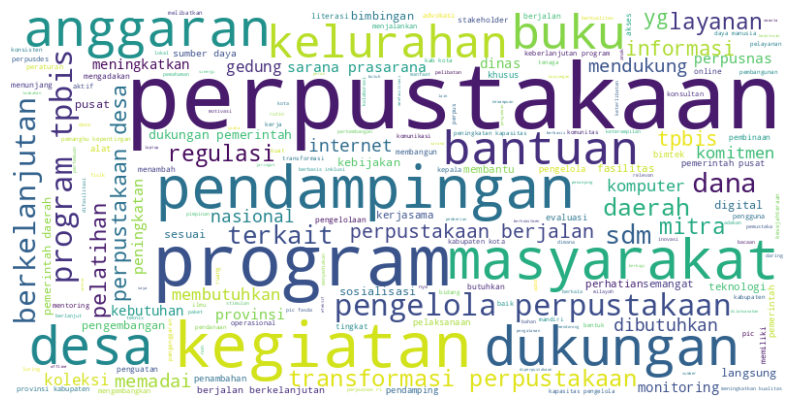

Topic 0: 0.019*"perpustakaan" + 0.016*"program" + 0.012*"pelatihan" + 0.010*"sarana" + 0.010*"tpbis" + 0.009*"desa" + 0.009*"sumber" + 0.008*"pengelola" + 0.008*"sdm" + 0.008*"berjalan"
Topic 1: 0.031*"perpustakaan" + 0.028*"pendampingan" + 0.028*"kegiatan" + 0.026*"program" + 0.019*"buku" + 0.014*"tpbis" + 0.013*"bantuan" + 0.012*"masyarakat" + 0.011*"dana" + 0.008*"berkelanjutan"
Topic 2: 0.081*"perpustakaan" + 0.024*"program" + 0.019*"dukungan" + 0.016*"desa" + 0.015*"pemerintah" + 0.014*"anggaran" + 0.012*"pengelola" + 0.011*"transformasi" + 0.010*"berjalan" + 0.009*"masyarakat"


In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
import nltk
nltk.download('stopwords')
# Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Replace with your file path

# Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('indonesian'))  # Use Indonesian stopwords
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

data['Harapan_clean'] = data['Harapan'].apply(preprocess_text)
#data['Rekomendasi_clean'] = data['Rekomendasi '].apply(preprocess_text)

# Combine both columns for analysis
all_text = data['Harapan_clean']

# --- 1. FREQUENCY ANALYSIS ---
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(all_text)
word_counts = pd.DataFrame(
    {'Word': vectorizer.get_feature_names_out(), 'Frequency': X.toarray().sum(axis=0)}
)
print("Top Words by Frequency:\n", word_counts.sort_values(by='Frequency', ascending=False))

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# --- 2. TOPIC MODELING ---
# Tokenize the text
tokenized_text = [text.split() for text in all_text]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# LDA Model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Display Topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


In [26]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Num Topics: 2, Coherence Score: 0.2555
Num Topics: 3, Coherence Score: 0.2867
Num Topics: 4, Coherence Score: 0.2783
Num Topics: 5, Coherence Score: 0.3600
Num Topics: 6, Coherence Score: 0.3417
Num Topics: 7, Coherence Score: 0.3279
Num Topics: 8, Coherence Score: 0.3731
Num Topics: 9, Coherence Score: 0.3728
Num Topics: 10, Coherence Score: 0.3809


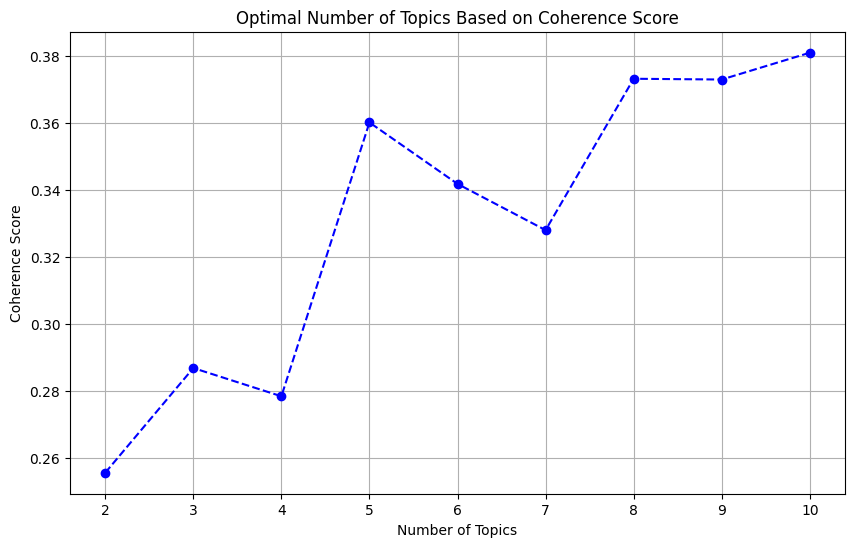


✅ Optimal Number of Topics: 10 (Coherence Score: 0.3809)


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')

# Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Replace with your file path

# Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('indonesian'))  # Use Indonesian stopwords
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

data['Harapan_clean'] = data['Harapan'].astype(str).apply(preprocess_text)

# Tokenize the text
tokenized_text = [text.split() for text in data['Harapan_clean']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Function to compute coherence score for different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_scores = []
    model_list = []
    for num_topics in range(start, limit + 1, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherencemodel.get_coherence())
        print(f"Num Topics: {num_topics}, Coherence Score: {coherencemodel.get_coherence():.4f}")
    return model_list, coherence_scores

# Compute coherence scores for different topic numbers
start, limit, step = 2, 10, 1  # Adjust range as needed
model_list, coherence_scores = compute_coherence_values(dictionary, corpus, tokenized_text, start, limit, step)

# Plot coherence scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, limit + 1, step), coherence_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics Based on Coherence Score")
plt.grid()
plt.show()

# Best topic number based on highest coherence score
optimal_topics = range(start, limit + 1, step)[coherence_scores.index(max(coherence_scores))]
print(f"\n✅ Optimal Number of Topics: {optimal_topics} (Coherence Score: {max(coherence_scores):.4f})")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Words by Frequency:
              Word  Frequency
15   perpustakaan        211
16        program        103
7            desa         56
9        kegiatan         52
8        dukungan         50
13   pendampingan         46
18          tpbis         45
11     masyarakat         42
14      pengelola         41
12     pemerintah         37
0        anggaran         36
3   berkelanjutan         36
2        berjalan         33
4            buku         31
5          daerah         31
1         bantuan         30
10      kelurahan         28
19   transformasi         26
6            dana         24
17            sdm         23


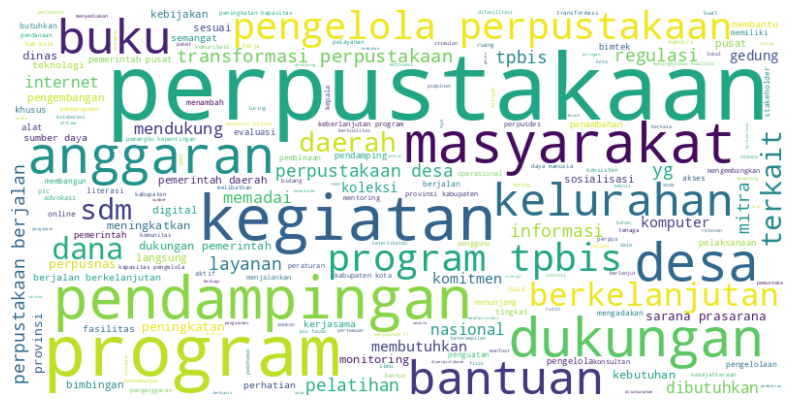

Topic 0: 0.025*"perpustakaan" + 0.017*"pemerintah" + 0.016*"dukungan" + 0.015*"informasi" + 0.015*"layanan" + 0.015*"teknologi" + 0.013*"meningkatkan" + 0.010*"transformasi" + 0.009*"sumber" + 0.008*"pemangku"
Topic 1: 0.067*"perpustakaan" + 0.039*"pendampingan" + 0.035*"berkelanjutan" + 0.032*"berjalan" + 0.026*"program" + 0.021*"masyarakat" + 0.019*"dukungan" + 0.017*"monitoring" + 0.013*"transformasi" + 0.013*"buku"
Topic 2: 0.068*"program" + 0.021*"komitmen" + 0.017*"pendampingan" + 0.013*"kegiatan" + 0.013*"bimtek" + 0.012*"daerah." + 0.011*"tpbis" + 0.011*"dukungan" + 0.011*"anggaran" + 0.011*"stakeholder"
Topic 3: 0.020*"buku" + 0.016*"tpbis" + 0.012*"perpustakaan" + 0.012*"bidang" + 0.012*"membutuhkan" + 0.010*"program" + 0.009*"dana" + 0.009*"kegiatan" + 0.009*"pelatihan" + 0.009*"jangka"
Topic 4: 0.033*"program" + 0.029*"kegiatan" + 0.027*"tpbis" + 0.025*"perpustakaan" + 0.020*"terkait" + 0.019*"daerah" + 0.015*"dinas" + 0.013*"bantuan" + 0.011*"dukungan" + 0.010*"pendampinga

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

nltk.download('stopwords')

# Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Ganti dengan path file Anda

# Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('indonesian'))
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

data['Harapan_clean'] = data['Harapan'].apply(preprocess_text)
all_text = data['Harapan_clean']

# --- 1️⃣ FREQUENCY ANALYSIS ---
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(all_text)
word_counts = pd.DataFrame(
    {'Word': vectorizer.get_feature_names_out(), 'Frequency': X.toarray().sum(axis=0)}
)
print("Top Words by Frequency:\n", word_counts.sort_values(by='Frequency', ascending=False))

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# --- 2️⃣ TOPIC MODELING ---
# Tokenizing
tokenized_text = [text.split() for text in all_text]

# Dictionary & Corpus
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# LDA Model
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display Topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# --- 3️⃣ COHERENCE SCORE ---
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"\nCoherence Score: {coherence_score:.4f}")

# --- 4️⃣ VISUALISASI TOPIK MENGGUNAKAN PyLDAvis ---
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Bigrams:
                          Ngram  Frequency
1523     pengelola perpustakaan         28
1816              program tpbis         28
2153  transformasi perpustakaan         21
1644          perpustakaan desa         18
1635      perpustakaan berjalan         17
1924           sarana prasarana         12
504         dukungan pemerintah         11
1420          pemerintah daerah         10
1668     perpustakaan kelurahan          9
2030                sumber daya          9

Top 10 Trigrams:
                                    Ngram  Frequency
2261   transformasi perpustakaan berjalan          7
1696  perpustakaan berjalan berkelanjutan          5
2147                  sumber daya manusia          5
1693        perpustakaan berbasis inklusi          4
1615      peningkatan kapasitas pengelola          4
1713          perpustakaan desa kelurahan          4
2044             sarana prasarana memadai          4
691      kapasitas pengelola perpustakaan          3
334         dana

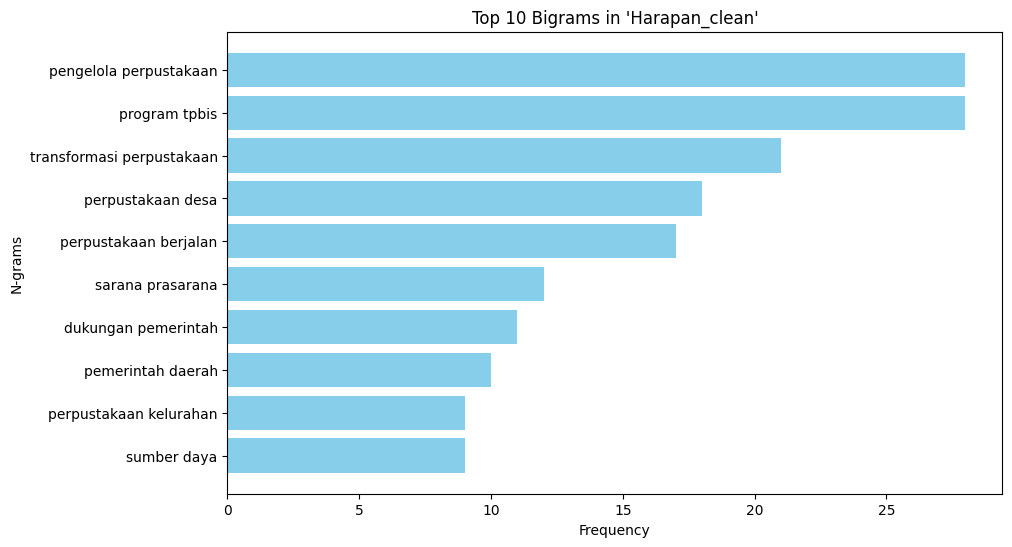

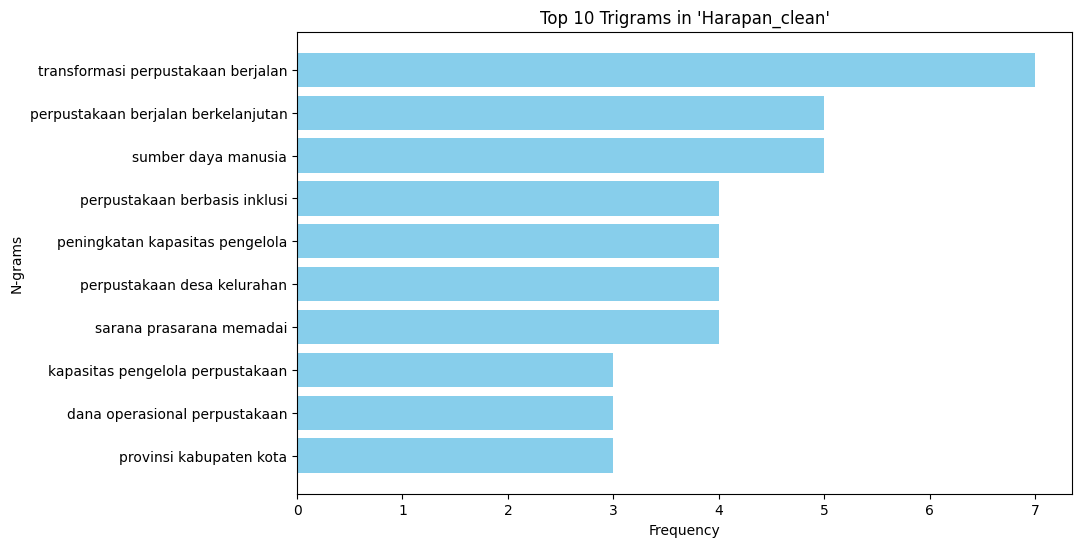

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Replace with your file path

# Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('indonesian'))  # Use Indonesian stopwords
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

data['Harapan_clean'] = data['Harapan'].apply(preprocess_text)

# --- N-gram Analysis Function ---
def extract_ngrams(corpus, n=2, top_k=10):
    """
    Extracts the top N-grams of specified length from a corpus.
    :param corpus: List of preprocessed text.
    :param n: Length of the N-gram (e.g., 2 for bigrams, 3 for trigrams).
    :param top_k: Number of top N-grams to return based on frequency.
    :return: DataFrame with N-grams and their frequencies.
    """
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.toarray().sum(axis=0)
    ngram_features = vectorizer.get_feature_names_out()

    ngram_df = pd.DataFrame({'Ngram': ngram_features, 'Frequency': ngram_counts})
    ngram_df = ngram_df.sort_values(by='Frequency', ascending=False).head(top_k)
    return ngram_df

# Analyze Bigrams and Trigrams
bigrams = extract_ngrams(data['Harapan_clean'], n=2, top_k=10)
trigrams = extract_ngrams(data['Harapan_clean'], n=3, top_k=10)

# Display Results
print("Top 10 Bigrams:")
print(bigrams)

print("\nTop 10 Trigrams:")
print(trigrams)

# Visualization (Optional)
import matplotlib.pyplot as plt

def plot_ngrams(ngram_df, title):
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_df['Ngram'], ngram_df['Frequency'], color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot the results
plot_ngrams(bigrams, "Top 10 Bigrams in 'Harapan_clean'")
plot_ngrams(trigrams, "Top 10 Trigrams in 'Harapan_clean'")


In [8]:
print(data.columns)


Index(['Harapan', 'Rekomendasi', 'Harapan_clean'], dtype='object')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Significant N-grams by Chi-Square Test:
                          Ngram  Chi2 Score       p-value
1588           peraturan kepala  746.000000  4.045651e-27
655           jaringan internet  746.000000  4.045651e-27
189      berkantor perpustakaan  746.000000  4.045651e-27
420   difasilitasi pendampingan  746.000000  4.045651e-27
1621        perpusnas berkantor  746.000000  4.045651e-27
1509         pengawasan program  746.000000  4.045651e-27
1121         memiliki perpusdes  746.000000  4.045651e-27
1102      membantu perpustakaan  746.000000  4.045651e-27
368               desa memiliki  746.000000  4.045651e-27
1469    pendampingan pengawasan  746.000000  4.045651e-27
1446       pendamping perpusnas  746.000000  4.045651e-27
1805       program perpustakaan  620.333333  1.344244e-14
1108           membutuhkan buku  620.333333  1.344244e-14
708          kebutuhan pengguna  620.333333  1.344244e-14
1913         ruang perpustakaan  620.333333  1.344244e-14
278           buku perpustak

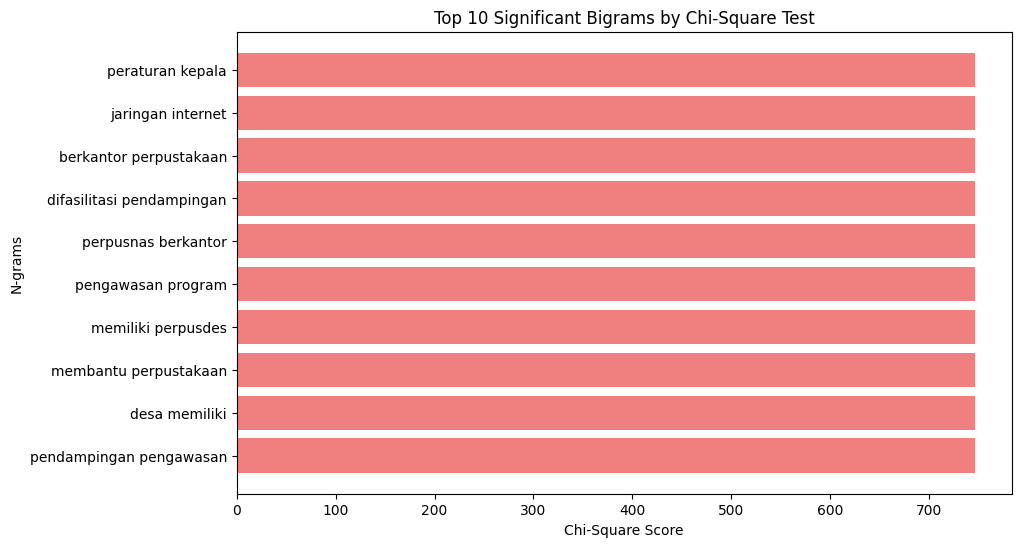

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')

# Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Replace with your file path

# Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('indonesian'))  # Use Indonesian stopwords
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

data['Harapan_clean'] = data['Harapan'].apply(preprocess_text)

# Example Categorical Column for Chi-Square Test
# Ensure you have a column like 'Region' or 'Category' to group data
data['Category'] = data['Harapan']  # Replace 'Region' with your categorical column

# Combine Text by Category for Analysis
grouped_data = data.groupby('Category')['Harapan_clean'].apply(' '.join).reset_index()

# --- N-gram Extraction ---
def extract_ngram_matrix(corpus, n=2):
    """
    Extracts an N-gram matrix and the feature names for Chi-Square analysis.
    :param corpus: List of preprocessed text.
    :param n: Length of the N-gram (e.g., 2 for bigrams, 3 for trigrams).
    :return: (N-gram matrix, feature names)
    """
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return X, feature_names

# Create N-gram Matrix
X, feature_names = extract_ngram_matrix(grouped_data['Harapan_clean'], n=2)

# Perform Chi-Square Analysis
chi2_scores, p_values = chi2(X, grouped_data['Category'].factorize()[0])

# Create a DataFrame for Results
chi2_results = pd.DataFrame({
    'Ngram': feature_names,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

# Filter Significant N-grams
significant_ngrams = chi2_results[chi2_results['p-value'] < 0.05]

print("Top Significant N-grams by Chi-Square Test:")
print(significant_ngrams)

# Visualization (Optional)
def plot_significant_ngrams(df, title):
    plt.figure(figsize=(10, 6))
    plt.barh(df['Ngram'], df['Chi2 Score'], color='lightcoral')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot Results
plot_significant_ngrams(significant_ngrams.head(10), "Top 10 Significant Bigrams by Chi-Square Test")


The n-grams are phrases that occur frequently together in your dataset. Here's an interpretation of your results:

High Chi2 Scores and Low p-values (e.g., "peraturan kepala," "jaringan internet," etc.): These n-grams have very high Chi2 scores and extremely low p-values, indicating that these word pairs or phrases are statistically significant and occur much more often together than would be expected by chance. A p-value close to zero suggests a strong relationship or association between these word pairs.

Medium Chi2 Scores and Higher p-values (e.g., "transformasi perpustakaan," "pengelola perpustakaan," etc.): These n-grams have slightly lower Chi2 scores and somewhat higher p-values but are still significant. They suggest that while these word combinations are somewhat less strongly associated than the first group, they still have meaningful relationships in your dataset.

In conclusion, phrases like "peraturan kepala," "jaringan internet," and "berkantor perpustakaan" have a strong statistical association in your data, while others like "transformasi perpustakaan" or "pengelola perpustakaan" are still significant but less so.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2

# ✅ Download stopwords (only needed once)
nltk.download('stopwords')

# ✅ Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Change path if needed

# ✅ Text Preprocessing Function
def preprocess_text(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    stop_words = set(stopwords.words('indonesian'))  # Use Indonesian stopwords
    words = text.lower().split()  # Lowercase and split words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# ✅ Apply Preprocessing
data['Harapan_clean'] = data['Harapan'].astype(str).apply(preprocess_text)

# ✅ Ensure a Categorical Column for Chi-Square Test
if 'Category' not in data.columns or data['Category'].nunique() < 2:
    data['Category'] = np.random.choice(['Group A', 'Group B'], size=len(data))  # Dummy categories if missing

# ✅ Group Text Data by Category
grouped_data = data.groupby('Category')['Harapan_clean'].apply(' '.join).reset_index()

# ✅ Function to Extract N-grams and Chi-Square Analysis
def extract_ngram_matrix(corpus, n=2, min_df=2):
    """
    Extracts an N-gram matrix for Chi-Square analysis.
    :param corpus: List of preprocessed text.
    :param n: N-gram range (e.g., 2 for bigrams, 3 for trigrams).
    :param min_df: Minimum document frequency to filter rare n-grams.
    :return: (N-gram matrix, feature names)
    """
    if len(corpus) < min_df:  # ✅ Avoids ValueError
        print("Warning: Not enough documents for selected min_df. Adjusting min_df to 1.")
        min_df = 1  # Auto-adjust to prevent errors

    vectorizer = CountVectorizer(ngram_range=(n, n), min_df=min_df)
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return X, feature_names

# ✅ Extract Bigrams (n=2)
X, feature_names = extract_ngram_matrix(grouped_data['Harapan_clean'], n=2, min_df=2)

# ✅ Perform Chi-Square Test
chi2_scores, p_values = chi2(X, grouped_data['Category'].factorize()[0])

# ✅ Create DataFrame for Results
chi2_results = pd.DataFrame({
    'Ngram': feature_names,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

# ✅ Filter Significant N-grams (p-value < 0.05)
significant_ngrams = chi2_results[chi2_results['p-value'] < 0.05]

# ✅ Display Top Results
print("\nTop Significant N-grams by Chi-Square Test:")
print(significant_ngrams)

# ✅ Visualization Function
def plot_significant_ngrams(df, title="Top Significant Bigrams by Chi-Square Test"):
    plt.figure(figsize=(10, 6))
    plt.barh(df['Ngram'], df['Chi2 Score'], color='lightcoral')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert for better readability
    plt.show()

# ✅ Plot Results
if not significant_ngrams.empty:
    plot_significant_ngrams(significant_ngrams.head(10))
else:
    print("⚠️ No significant n-grams found (p-value > 0.05). Consider adjusting min_df or dataset size.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top Significant N-grams by Chi-Square Test:
Empty DataFrame
Columns: [Ngram, Chi2 Score, p-value]
Index: []
⚠️ No significant n-grams found (p-value > 0.05). Consider adjusting min_df or dataset size.


In [10]:
from collections import Counter
import itertools

# Extract bigrams
X, feature_names = extract_ngram_matrix(data['Harapan_clean'], n=2)
bigrams_count = X.toarray().sum(axis=0)

# Create DataFrame for results
bigram_results = pd.DataFrame({
    'Ngram': feature_names,
    'Count': bigrams_count
}).sort_values(by='Count', ascending=False)

print("Most Frequent Bigrams:")
print(bigram_results.head(10))


Most Frequent Bigrams:
                          Ngram  Count
1523     pengelola perpustakaan     28
1816              program tpbis     28
2153  transformasi perpustakaan     21
1644          perpustakaan desa     18
1635      perpustakaan berjalan     17
1924           sarana prasarana     12
504         dukungan pemerintah     11
1420          pemerintah daerah     10
1668     perpustakaan kelurahan      9
2030                sumber daya      9


In [5]:
# Count frequency of significant n-grams by category
from collections import Counter

# Get the top significant n-grams
top_ngrams = significant_ngrams['Ngram'].head(10).tolist()  # Adjust based on how many you want

# Filter data to find the occurrences of these n-grams in the original data
def count_ngram_occurrences(text, ngrams):
    return sum([1 for ngram in ngrams if ngram in text])

# Apply the counting function to each category
data['ngram_count'] = data['Harapan_clean'].apply(lambda x: count_ngram_occurrences(x, top_ngrams))

# Group by category to see how the significant n-grams are distributed
category_ngram_counts = data.groupby('Category')['ngram_count'].sum().reset_index()

# Sort by the n-gram count
category_ngram_counts = category_ngram_counts.sort_values(by='ngram_count', ascending=False)

print(category_ngram_counts)


                                              Category  ngram_count
200  Pendamping perpusnas sebaiknya berkantor di pe...            4
249  Program ini perlu diperluas dengan melibatkan ...            2
233  Perlu adanya pendampingan dan pengawasan progr...            2
0    \nAgar transformasi perpustakaan dapat terus b...            1
173  Menurut saya yang saat ini sangat di butuhkan ...            1
..                                                 ...          ...
127                                        Komunikasi             0
126                                  Komputer dan buku            0
125          Komitment setiap stekhorder dan semangat             0
124  Komitmen, keseriusan dan dampak dari kegiatan ...            0
373  yang sangat di butuhkan adalah regulasi, kebij...            0

[374 rows x 2 columns]


In [6]:
import pandas as pd

# Assuming category_ngram_counts is already calculated as in the previous code
category_ngram_counts = category_ngram_counts.sort_values(by='ngram_count', ascending=False)

# Display as a table
pd.set_option('display.max_rows', None)  # Adjust this if you have a lot of categories
category_ngram_counts


,Category,ngram_count
200,Pendamping perpusnas sebaiknya berkantor di pe...,4
233,Perlu adanya pendampingan dan pengawasan progr...,2
249,Program ini perlu diperluas dengan melibatkan ...,2
0,\nAgar transformasi perpustakaan dapat terus b...,1
173,Menurut saya yang saat ini sangat di butuhkan ...,1
310,Untuk wilayah yang terkendala dapat dukungan j...,1
187,Para peserta program TPBIS seharusnya difasili...,1
10,1. Peningkatan Layanan Informasi \n2. Memperlu...,0
19,ANGGARAN DANA,0
11,1. Penyediaan akses internet gratis di perpust...,0


In [23]:
import pandas as pd
import nltk
import networkx as nx
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter
from itertools import islice

# ✅ Download Stopwords (Only Needed Once)
nltk.download('stopwords')

# ✅ Define Custom Stopwords
custom_stopwords = set(stopwords.words('indonesian'))  # Default Indonesian stopwords
custom_stopwords.update(["yang", "dengan", "untuk", "akan", "bisa", "kami", "dapat", "atara", "kalo", "saya"])  # Add more if needed

# ✅ Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Adjust file path

# ✅ Text Preprocessing Function
def preprocess_text(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    words = text.lower().split()  # Lowercase and split words
    words = [word for word in words if word not in custom_stopwords]  # Remove stopwords
    return " ".join(words)

# ✅ Apply Preprocessing
data['Harapan_clean'] = data['Harapan'].astype(str).apply(preprocess_text)

# ✅ Extract Bigrams
def get_bigrams(texts):
    bigram_list = []
    for text in texts:
        words = text.split()
        bigram_list.extend(list(nltk.bigrams(words)))  # Create bigrams
    return bigram_list

bigrams = get_bigrams(data['Harapan_clean'])

# ✅ Count Bigram Frequency
bigram_freq = Counter(bigrams)
top_bigrams = dict(islice(bigram_freq.items(), 30))  # Get Top 30 Bigrams

# ✅ Create Graph
G = nx.Graph()

# ✅ Add Nodes & Edges
for (word1, word2), freq in top_bigrams.items():
    G.add_edge(word1, word2, weight=freq)

# ✅ Graph Layout (Spring Layout for Smooth Positioning)
pos = nx.spring_layout(G, seed=42, k=0.7)

# ✅ Extract Node Positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# ✅ Create Edges in Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color="rgba(50, 50, 50, 0.5)"),  # Transparent edges
    hoverinfo="none",
    mode="lines"
)

# ✅ Create Nodes in Plotly
node_x = []
node_y = []
node_size = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_size.append(15 + len(G[node]) * 3)  # Size based on connectivity
    node_text.append(f"{node} (Connections: {len(G[node])})")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode="markers+text",
    text=node_text,
    textposition="top center",
    hoverinfo="text",
    marker=dict(
        size=node_size,
        color="deepskyblue",
        line=dict(width=2, color="black")
    )
)

# ✅ Create Interactive Figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="📌 Interactive Word Relationship Graph (Custom Stopwords)",
    titlefont_size=16,
    showlegend=False,
    hovermode="closest",
    margin=dict(b=0, l=0, r=0, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
)

# ✅ Show Graph
fig.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import pandas as pd
import nltk
import networkx as nx
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter
from itertools import islice

# ✅ Download Stopwords (Only Needed Once)
nltk.download('stopwords')

# ✅ Define Custom Stopwords
custom_stopwords = set(stopwords.words('indonesian'))
custom_stopwords.update(["yang", "dengan", "untuk", "akan", "bisa", "kami", "dapat", "antara", "kalo", "saya"])

# ✅ Load Data
data = pd.read_excel("/content/TPBIS_qual.xlsx")  # Adjust file path

# ✅ Text Preprocessing Function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    words = text.lower().split()
    words = [word for word in words if word not in custom_stopwords]
    return " ".join(words)

# ✅ Apply Preprocessing
data['Harapan_clean'] = data['Harapan'].astype(str).apply(preprocess_text)

# ✅ Extract Bigrams
def get_bigrams(texts):
    bigram_list = []
    for text in texts:
        words = text.split()
        bigram_list.extend(list(nltk.bigrams(words)))
    return bigram_list

bigrams = get_bigrams(data['Harapan_clean'])

# ✅ Count Bigram Frequency
bigram_freq = Counter(bigrams)
top_bigrams = dict(islice(bigram_freq.items(), 30))  # Top 30 Bigrams

# ✅ Create Graph
G = nx.Graph()
for (word1, word2), freq in top_bigrams.items():
    G.add_edge(word1, word2, weight=freq)

# ✅ Graph Layout
pos = nx.spring_layout(G, seed=42, k=1.5)  # More spacing between nodes

# ✅ Extract Edge Data
edge_traces = []
for edge in G.edges(data=True):
    word1, word2, attributes = edge
    x0, y0 = pos[word1]
    x1, y1 = pos[word2]

    edge_trace = go.Scatter(
        x=[x0, x1], y=[y0, y1],
        line=dict(width=0.5 + attributes['weight'] / 5, color="rgba(50, 50, 50, 0.5)"),  # Scale edge width
        mode="lines",
        hoverinfo="none"
    )
    edge_traces.append(edge_trace)

# ✅ Extract Node Data
node_x = []
node_y = []
node_size = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_size.append(15 + len(G[node]) * 3)  # Size based on connectivity
    node_text.append(f"{node} (Connections: {len(G[node])})")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode="markers+text",
    text=node_text,
    textposition="top center",
    hoverinfo="text",
    marker=dict(
        size=node_size,
        color="deepskyblue",
        line=dict(width=2, color="black")
    )
)

# ✅ Create Interactive Figure
fig = go.Figure(data=edge_traces + [node_trace])  # Add all edges separately
fig.update_layout(
    title="📌 Improved Interactive Word Relationship Graph",
    titlefont_size=18,
    showlegend=False,
    hovermode="closest",
    width=1200, height=800,  # Bigger graph
    margin=dict(b=0, l=0, r=0, t=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
)

# ✅ Show Graph
fig.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


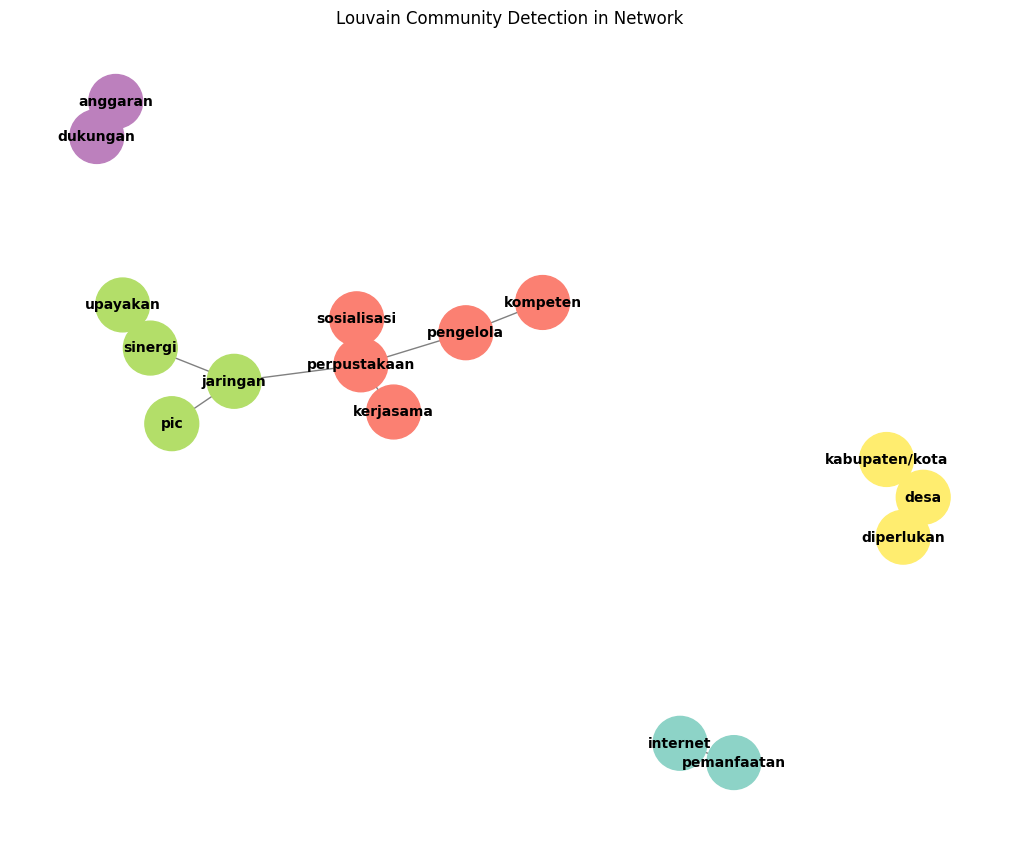

In [35]:
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# 1. Buat Graph (atau gunakan data yang sudah ada)
G = nx.Graph()

# Tambahkan node dan edge (contoh data, bisa disesuaikan)
edges = [
    ("perpustakaan", "pengelola"), ("perpustakaan", "jaringan"),
    ("jaringan", "sinergi"), ("sinergi", "upayakan"),
    ("kabupaten/kota", "desa"), ("desa", "diperlukan"),
    ("pengelola", "kompeten"), ("internet", "pemanfaatan"),
    ("dukungan", "anggaran"), ("perpustakaan", "sosialisasi"),
    ("jaringan", "pic"), ("perpustakaan", "kerjasama")
]
G.add_edges_from(edges)

# 2. Jalankan Algoritma Louvain untuk Deteksi Komunitas
partition = community_louvain.best_partition(G)

# 3. Visualisasi dengan Warna yang Berbeda untuk Setiap Komunitas
plt.figure(figsize=(10, 8))

# Tentukan warna untuk setiap komunitas
colors = [partition[node] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)  # Posisi node dalam graf

# Gambar jaringan
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.Set3, edge_color="gray", node_size=1500, font_size=10, font_weight="bold")

# Tampilkan plot
plt.title("Louvain Community Detection in Network")
plt.show()
